## ENERGY METER - Building electricity consumption

In [32]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import json_normalize
import pandas as pd
import glob

In [33]:
# Trova tutti i file CSV che seguono il pattern 2023_*.csv
mainpath = '/home/gabriele/Scrivania/BUILDON/PILOT 4/P4 - EDF/Building electricity consumption/K0XRLNlG_2023-01-01_2024-08-28/K0XRLNlG/'
file_list = glob.glob(f'{mainpath}2023_*.csv') + glob.glob(f'{mainpath}2024_*.csv')

# Lista per contenere i DataFrame letti
df_list = []

# Leggi ciascun file CSV e aggiungi il DataFrame risultante alla lista
for file in file_list:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatena tutti i DataFrame in un unico DataFrame
df_combinato = pd.concat(df_list, ignore_index=True)
df_combinato['dateTime'] = pd.to_datetime(df_combinato['dateTime'])

#df_combinato['dateTime'] = pd.to_datetime(df_combinato['dateTime'], format='mixed', utc=True).dt.tz_convert(None)
df_combinato = df_combinato.sort_values(by='dateTime')

# Visualizza le prime righe del DataFrame combinato
df_combinato.head()


,dateTime,deviceName,propertyName,equipmentName,payload,scaledPayload,unit,deviceId,propertyId,equipmentId,protocol,timestamp
129379,2023-02-06 16:20:48,Gateway K15,Total active energy import,Chauffage 1erN,15907.660156,NaN,kWH,K0XRLNlG,0PvqK8Thl2uoPXJG,AFwWMMQI8Jhvbb2z,MODBUS_SERIAL,1675700448614
129380,2023-02-06 16:25:02,Gateway K15,Total active energy import,Chauffage 1erN,15907.991211,NaN,kWH,K0XRLNlG,0PvqK8Thl2uoPXJG,AFwWMMQI8Jhvbb2z,MODBUS_SERIAL,1675700702467
129381,2023-02-06 16:25:02,Gateway K15,Total active energy import,Eclairage 1erN,1541.546997,NaN,kWH,K0XRLNlG,r1Oy2O73Zy0w5Gs8,tHPJSLxOHMmGOSla,MODBUS_SERIAL,1675700702492
129382,2023-02-06 16:25:02,Gateway K15,Total active energy import,PC 1erN,895.892029,NaN,kWH,K0XRLNlG,wYnvtzkwqlY3y7k2,r7WksALh3gmQn1bg,MODBUS_SERIAL,1675700702519
129383,2023-02-06 16:25:02,Gateway K15,Total active energy import,PC bureau 127 1erN,53.808998,NaN,kWH,K0XRLNlG,HH4mYUUn5Ihpmkwv,WwQ5wxdQYReIgVUF,MODBUS_SERIAL,1675700702552


In [34]:
df_combinato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905460 entries, 129379 to 471759
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dateTime       905460 non-null  datetime64[ns]
 1   deviceName     905460 non-null  object        
 2   propertyName   905460 non-null  object        
 3   equipmentName  905460 non-null  object        
 4   payload        905460 non-null  float64       
 5   scaledPayload  0 non-null       float64       
 6   unit           905460 non-null  object        
 7   deviceId       905460 non-null  object        
 8   propertyId     905460 non-null  object        
 9   equipmentId    905460 non-null  object        
 10  protocol       905460 non-null  object        
 11  timestamp      905460 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 89.8+ MB


In [21]:
# Trova la prima e l'ultima data nella colonna 'timestamp'
prima_data = df_combinato['dateTime'].min()
ultima_data = df_combinato['dateTime'].max()

# Mostra la prima e l'ultima data
print(f"La prima data è: {prima_data}")
print(f"L'ultima data è: {ultima_data}")

La prima data è: 2023-02-06 16:20:48
L'ultima data è: 2024-08-28 07:36:58


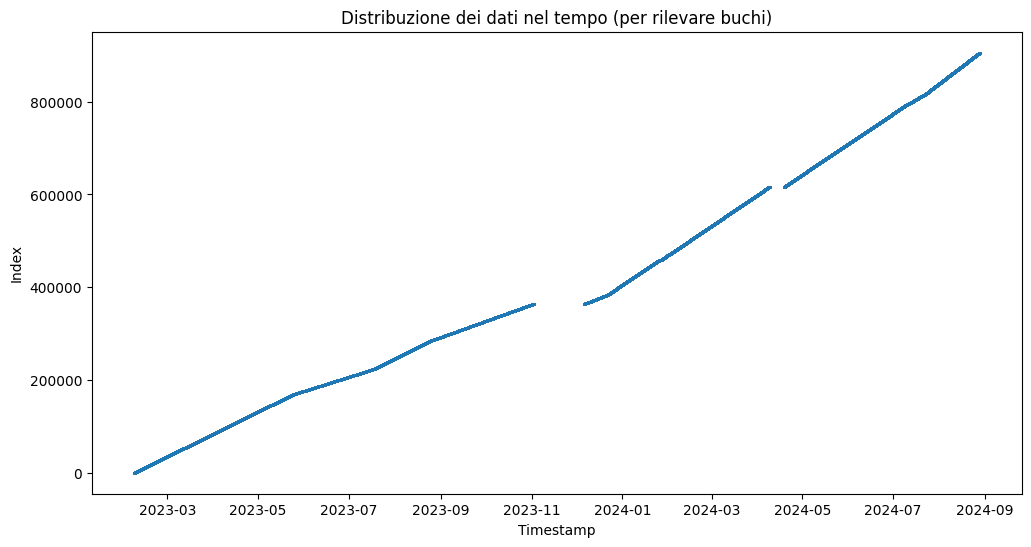

In [22]:
# Creazione del grafico a dispersione
plt.figure(figsize=(12, 6))
plt.scatter(df_combinato['dateTime'], range(len(df_combinato)), s=1)
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.title('Distribuzione dei dati nel tempo (per rilevare buchi)')
plt.show()


## INDOOR SENSOR - Indoor conditions timeseries

I sensori indoor mostrano soltanto temperatura umidità ecc. di alcune stanze e non tutto l'edificio

In [ ]:
'''
ID	                Location
POD2-00335	        011 - Ground floor North
POD2-00337	        020 - Ground floor North
POD2-00338	        113 - 1st floor North
POD2-00340	        123 - 1st floor North
POD2-00341	        108 - 1st floor South
6102001000042	    016 - Ground floor North
6102001000103	    121 - 1st floor North
6102001000202	    Ground floor South (non utilizzabile)
6102001000219	    111 - 1st floor South
6102001000165	    104 - 1st floor South
'''

## Weather conditions

In [37]:
# Trova tutti i file CSV che seguono il pattern 2023_*.csv
mainpath2 = '/home/gabriele/Scrivania/BUILDON/PILOT 4/P4 - EDF/Weather conditions/csvimportati/'
file_list2 = glob.glob(f'{mainpath2}export_*.csv')
# Lista per contenere i DataFrame letti
df_list2 = []

# Leggi ciascun file CSV e aggiungi il DataFrame risultante alla lista
for file in file_list2:
    df2 = pd.read_csv(file, sep=';')
    df_list2.append(df2)

# Concatena tutti i DataFrame in un unico DataFrame
df_combinato2 = pd.concat(df_list2, ignore_index=True)
#df_combinato['dateTime'] = pd.to_datetime(df_combinato['dateTime'], format='mixed', utc=True).dt.tz_convert(None)

df_combinato2['Date'] = pd.to_datetime(df_combinato2['Date'],dayfirst=True)
df_combinato2 = df_combinato2.sort_values(by='Date')

# Visualizza le prime righe del DataFrame combinato
df_combinato2.head()

,ID Measure,Operator,Station,Serial,City,School,Room,Campaign,Pressure(mb),Temperature(°C),...,COV(ppb),Battery(V),PM1(µg/m3),PM2.5(µg/m3),PM4(µg/m3),PM10(µg/m3),Comment,Date,NO2(ppb),COVT(ppm)
240977,275908,Admin,6102001000219,6102001000219,Ville par défaut,Etablissement par défaut,Pièce par défaut,Campagne par défaut,1017.5938,18.50,...,44,4.1562,4.0,4.0,4.0,4.0,NaN,2022-12-28 00:00:48,4.7939,0.1875
53886,275920,Admin,6082001000139,6082001000139,Ville par défaut,Etablissement par défaut,Pièce par défaut,Campagne par défaut,1019.2188,8.75,...,35,3.8750,6.0,10.0,NaN,26.0,NaN,2022-12-28 00:02:21,9.0000,0.0312
92630,275930,Admin,6102001000103,6102001000103,Ville par défaut,Etablissement par défaut,Pièce par défaut,Campagne par défaut,1015.2812,25.00,...,15,4.1562,1.0,2.0,2.0,3.0,NaN,2022-12-28 00:04:19,NaN,NaN
174648,275940,Admin,6102001000202,6102001000202,Ville par défaut,Etablissement par défaut,Pièce par défaut,Campagne par défaut,1016.6875,17.50,...,23,4.1562,2.0,2.0,2.0,2.0,NaN,2022-12-28 00:04:42,18.3088,0.0859
81269,275898,Admin,6102001000042,6102001000042,Ville par défaut,Etablissement par défaut,Pièce par défaut,Campagne par défaut,1015.6250,20.50,...,0,4.1562,2.0,2.0,3.0,3.0,NaN,2022-12-28 00:09:17,NaN,NaN


In [38]:
# Trova la prima e l'ultima data nella colonna 'timestamp'
prima_data2 = df_combinato2['Date'].min()
ultima_data2 = df_combinato2['Date'].max()

# Mostra la prima e l'ultima data
print(f"La prima data è: {prima_data}")
print(f"L'ultima data è: {ultima_data}")

La prima data è: 2022-12-28 00:00:48
L'ultima data è: 2024-08-29 11:59:42


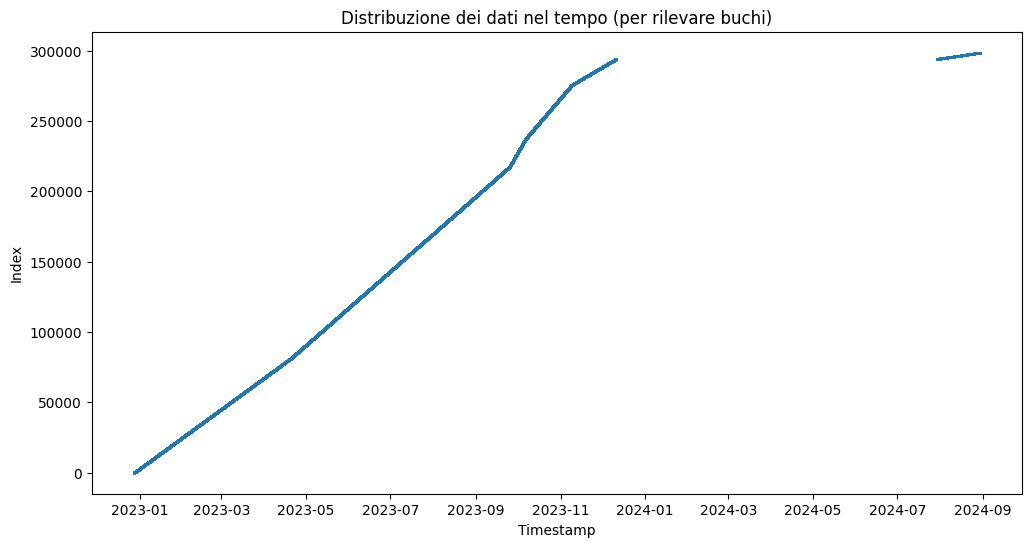

In [39]:
# Creazione del grafico a dispersione
plt.figure(figsize=(12, 6))
plt.scatter(df_combinato2['Date'], range(len(df_combinato2)), s=1)
plt.xlabel('Timestamp')
plt.ylabel('Index')
plt.title('Distribuzione dei dati nel tempo (per rilevare buchi)')
plt.show()